<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week05_CH05_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC2/5week_CH05_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH05 시각화 라이브러리(2)

날짜: 4월 07일 월요일( 5주차 )

## 5.1 시본(Seaborn) 라이브러리의 개요

이론들... 교재 보기

## 5.2 시본 라이브러리

### 5.2.(1) 데이터 시각화 준비하기

In [43]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# 외부데이터 이용하기 - 엑셀 파일 불러오기
data = pd.read_excel('/content/drive/MyDrive/data/05_data1.xlsx')
data

,no,city_code,gender,age_code,height,weight,waist,systolic,diastolic,blood_sugar,cholesterol,triglycerides,HDL,LDL,hemoglobin,serum,smoking,drinking
0,1,36,1,9,165,60,72.1,127,79,90,188,58,58.0,118,15.0,1.1,1,0
1,5,41,2,12,155,50,75.2,144,89,110,220,171,53.0,133,12.4,0.7,1,0
2,6,27,1,9,185,85,94.0,114,72,86,234,183,50.0,147,16.4,1.1,3,1
3,7,44,1,9,165,80,93.0,112,73,250,119,265,26.0,40,15.7,0.7,3,1
4,9,41,2,17,150,50,82.0,136,65,104,177,61,63.0,101,13.3,0.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,7648,31,2,11,155,55,68.0,132,82,97,198,60,80.0,106,10.6,0.9,1,1
2996,7650,42,1,13,155,60,79.0,123,68,90,157,122,46.0,86,15.0,0.8,1,0
2997,7651,41,1,9,165,60,85.0,118,81,81,100,55,46.0,43,15.1,0.8,1,0
2998,7652,42,1,9,180,90,97.0,148,90,101,235,232,43.0,145,16.6,0.7,1,1


data.loc[행조건, 열선택]

**DataFrame.loc[행 조건, 열 선택] = 새로운 값**

In [46]:
# 2020년 건강검진 정보에서 성별, 음주 여부, 흡연 상태에 따라 데이터 처리

# 모든 데이터 중에 6개의 데이터만 받기(성별,키,몸무게,허리둘레,음주여부,흡연여부)
data6 = data.loc[:,['gender','height','weight', 'waist','drinking','smoking']]
print("data6 가공 전: ")
print(data6)

# 성별 정보 가공하기
data6.loc[data6['gender']==1,['gender']]='M' # data6에서 gender 값이 1인 행들의 gender 값을 'Male'로 바꾸기
data6.loc[data6['gender']==2,['gender']]='F'

# 음주 여부 데이터 가공하기
data6.loc[data6['drinking']==0, ['drinking']]='Non-drinking' #
data6.loc[data6['drinking']==1, ['drinking']]='Drinking' #

# 흡연 상태 데이터 가공하기
data6.loc[data6['smoking']==1,['smoking']]='Non-smoking' # 비흡연자
data6.loc[data6['smoking']==2,['smoking']]='Quit-smoking' # 금연자
data6.loc[data6['smoking']==3,['smoking']]='Smoking' # 흡연자


data6 가공 전: 
      gender  height  weight  waist  drinking  smoking
0          1     165      60   72.1         0        1
1          2     155      50   75.2         0        1
2          1     185      85   94.0         1        3
3          1     165      80   93.0         1        3
4          2     150      50   82.0         0        1
...      ...     ...     ...    ...       ...      ...
2995       2     155      55   68.0         1        1
2996       1     155      60   79.0         0        1
2997       1     165      60   85.0         0        1
2998       1     180      90   97.0         1        1
2999       1     160      65   89.8         1        2

[3000 rows x 6 columns]


<ipython-input-46-02564807d819>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['gender']==1,['gender']]='M' # data6에서 gender 값이 1인 행들의 gender 값을 'Male'로 바꾸기
<ipython-input-46-02564807d819>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-drinking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['drinking']==0, ['drinking']]='Non-drinking' #
<ipython-input-46-02564807d819>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Non-smoking' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data6.loc[data6['smoking']==1,['smoking']]='Non-smok

In [47]:
# 데이터 가공 후 보기
print("data6 가공 후: ")
print(data6)

data6 가공 후: 
     gender  height  weight  waist      drinking       smoking
0         M     165      60   72.1  Non-drinking   Non-smoking
1         F     155      50   75.2  Non-drinking   Non-smoking
2         M     185      85   94.0      Drinking       Smoking
3         M     165      80   93.0      Drinking       Smoking
4         F     150      50   82.0  Non-drinking   Non-smoking
...     ...     ...     ...    ...           ...           ...
2995      F     155      55   68.0      Drinking   Non-smoking
2996      M     155      60   79.0  Non-drinking   Non-smoking
2997      M     165      60   85.0  Non-drinking   Non-smoking
2998      M     180      90   97.0      Drinking   Non-smoking
2999      M     160      65   89.8      Drinking  Quit-smoking

[3000 rows x 6 columns]


### 5.2.(2) 시본 막대 그래프

In [48]:
# 성별과 음주 상태별로 그룹화하여 각 그룹의 개수(count) 계산
drinking = data6.groupby(['gender', 'drinking'])['drinking'].count()
print("drinking에 count 적용한 것: \n")
print(drinking)

# 성별과 흡연 상태별로 그룹화하여 각 그룹의 개수(count) 계산
smoking = data6.groupby(['gender', 'smoking'])['smoking'].count()
print("\n smoking에 count 적용한 것: \n")
print(smoking)


drinking에 count 적용한 것: 

gender  drinking    
F       Drinking         611
        Non-drinking     888
M       Drinking        1086
        Non-drinking     415
Name: drinking, dtype: int64

 smoking에 count 적용한 것: 

gender  smoking     
F       Non-smoking     1422
        Quit-smoking      45
        Smoking           32
M       Non-smoking      502
        Quit-smoking     519
        Smoking          480
Name: smoking, dtype: int64


In [49]:
# 현재 시리즈 형식임. 그래서 결과를 DataFrame으로 변환하고 'count'라는 컬럼 이름 지정
drinking = drinking.to_frame(name='count')
smoking = smoking.to_frame(name='count')

**reset_index()는 왜 하는가?**  

1.   groupby()를 쓰면 인덱스가 바뀐다. 계층형 인덱스(MultiIndex)가 만들어짐.
2.   이런 계층형 인덱스는 시각화, 엑셀로 저장, 컬럼 선택할 때 불편하다.




In [50]:
# 인덱스를 일반 열로 변환
drinking = drinking.reset_index()
smoking = smoking.reset_index()
print(drinking.index)

RangeIndex(start=0, stop=4, step=1)


##### 기본 막대 그래프 그리기


- plt.title() : 각 서브플롯(subplot)의 제목 즉, 개별 그래프 위에 표시
- fig.suptitle() : 전체 그림(figure)의 큰 제목 즉, 모든 그래프 위에 통합적으로 표시



🎨 서브플롯(Subplot)이란?  
한 화면(도화지) 안에 여러 개의 그래프를 나란히 혹은 겹치지 않게 그리는 방법.

subplot은 그 도화지를 **몇 행 × 몇 열로 나눠서 생긴 "칸"**이라고 생각하면됨.  

전체 figure는 도화지 한 장 🖼️

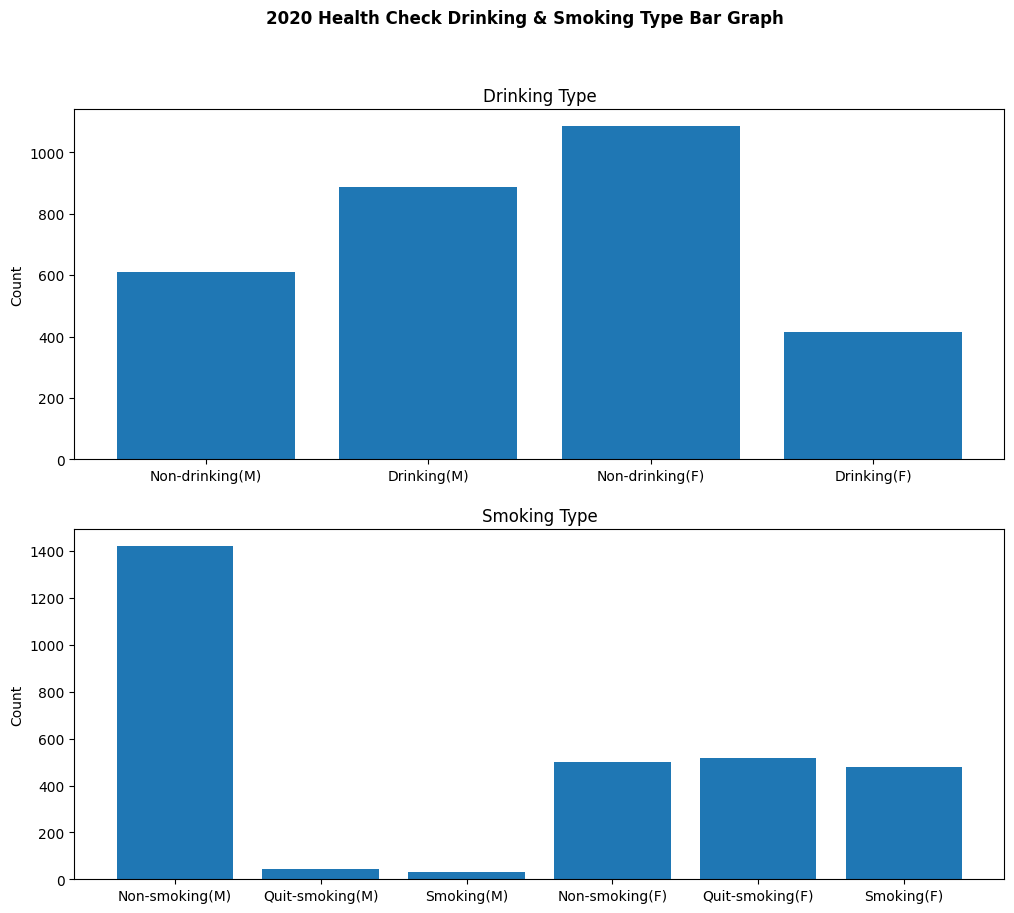

In [51]:
# 그림 전체 생성 (가로 12, 세로 10 크기)
fig = plt.figure(figsize=(12, 10))

# 전체 그래프의 제목 설정 (굵은 글씨)
fig.suptitle('2020 Health Check Drinking & Smoking Type Bar Graph', fontweight='bold')

# x축 위치를 위한 인덱스 배열 생성
index1 = np.arange(4) # 음주 항목용 (4개)
index2 = np.arange(6) # 흡연 항목용 (6개)

# 첫 번째 서브플롯 추가 (2행 1열의 첫 번째 자리)
fig.add_subplot(2, 1, 1)  # (행, 열, 위치) - 2행 1열의 첫 번째
plt.bar(index1, drinking['count'])  # 막대그래프 그리기 (음주 데이터)
plt.title('Drinking Type')  # 서브 타이틀
plt.ylabel('Count')  # y축 이름
plt.xticks(index1, ['Non-drinking(M)', 'Drinking(M)', 'Non-drinking(F)', 'Drinking(F)'])  # x축 라벨 설정

# 두 번째 서브플롯 추가 (2행 1열의 두 번째 자리)
fig.add_subplot(2, 1, 2) #  - 2행 1열의 두 번째
plt.bar(index2, smoking['count'])  # 막대그래프 그리기 (흡연 데이터)
plt.title('Smoking Type')  # 서브 타이틀
plt.ylabel('Count')  # y축 이름
plt.xticks(index2, ['Non-smoking(M)', 'Quit-smoking(M)', 'Smoking(M)',
                    'Non-smoking(F)', 'Quit-smoking(F)', 'Smoking(F)'])  # x축 라벨 설정

# 그래프 보여주기
plt.show()


##### 시본 막대 그래프 그리기

무슨 차이일까?
- 기본 막대그래프(= matplotlib의 plt.bar())
- 시본(Seaborn)의 막대그래프(= sns.barplot())

**🎯 주요 차이 요약**
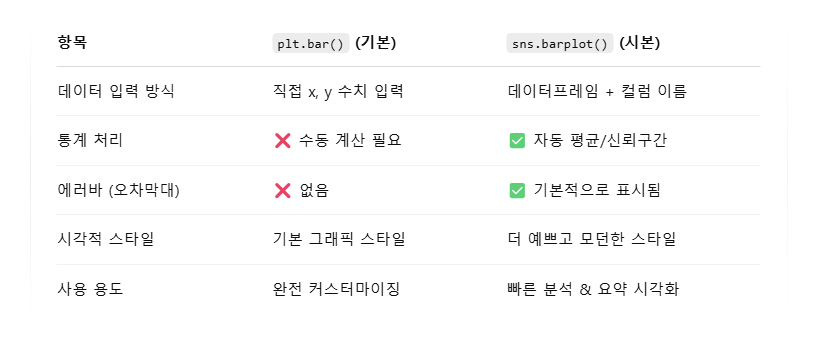

<Axes: xlabel='gender', ylabel='height'>

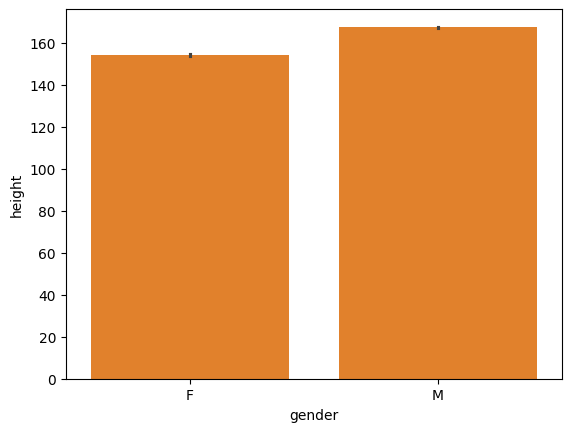

In [52]:
# 🧪 예시 비교 - 같은 결과지만, 시본이 훨씬 간단하고 자동화되어 있음!

# 기본 막대그래프
group_means = data6.groupby('gender')['height'].mean()
plt.bar(group_means.index, group_means.values)

# 시본 막대그래프
sns.barplot(x='gender', y='height', data=data6)

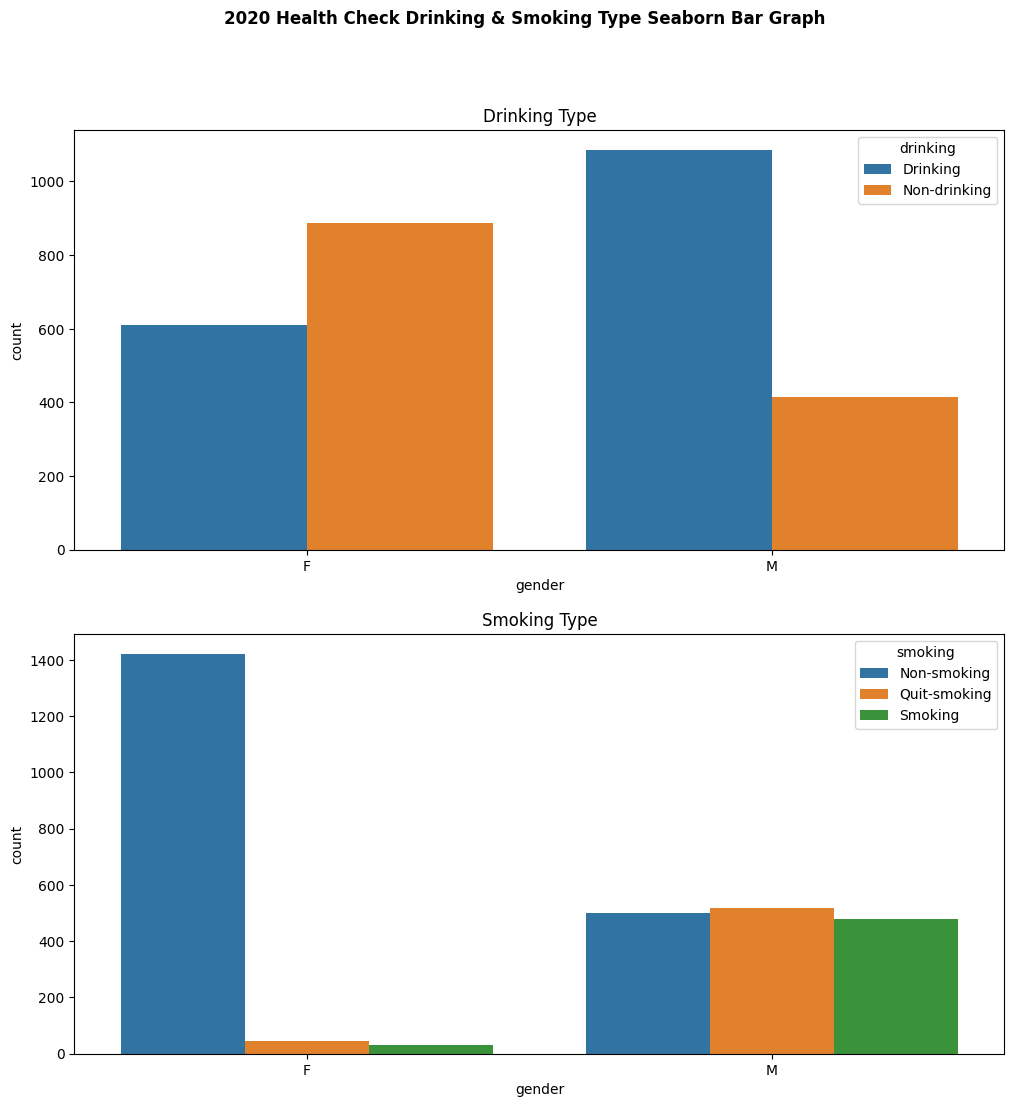

In [53]:
# 그래프
fig = plt.figure(figsize=(12,12)) # inch단위

# 도화지를 칸으로 나누고 변수에 저장
area1 = fig.add_subplot(2, 1, 1)
area2 = fig.add_subplot(2, 1, 2)

# 성별(gender)과 음주(drinking) 정보를 바탕으로 막대그래프 생성
ax1 = sns.barplot(x='gender', y='count', # 열 입력
                  hue='drinking', # 색상으로 구분할 기준 컬럼
                  data=drinking, # 해당 열의 '진짜 데이터'는 여기에 있음
                  ax=area1)

# 성별(gender)과 흡연(smoking) 정보를 바탕으로 막대그래프 생성
ax2 = sns.barplot(x='gender', y='count',
                  hue='smoking',
                  data=smoking,
                  ax=area2)

# 전체 그래프 제목
fig.suptitle('2020 Health Check Drinking & Smoking Type Seaborn Bar Graph', fontweight='bold')

# 서브 그래프 각각의 제목
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

# 그래프 출력
plt.show()


위에 코드랑 똑같은데 레이아웃만 다름.  
위에는 2행 1열인데   
**아래 코드는 1행 2열**임!

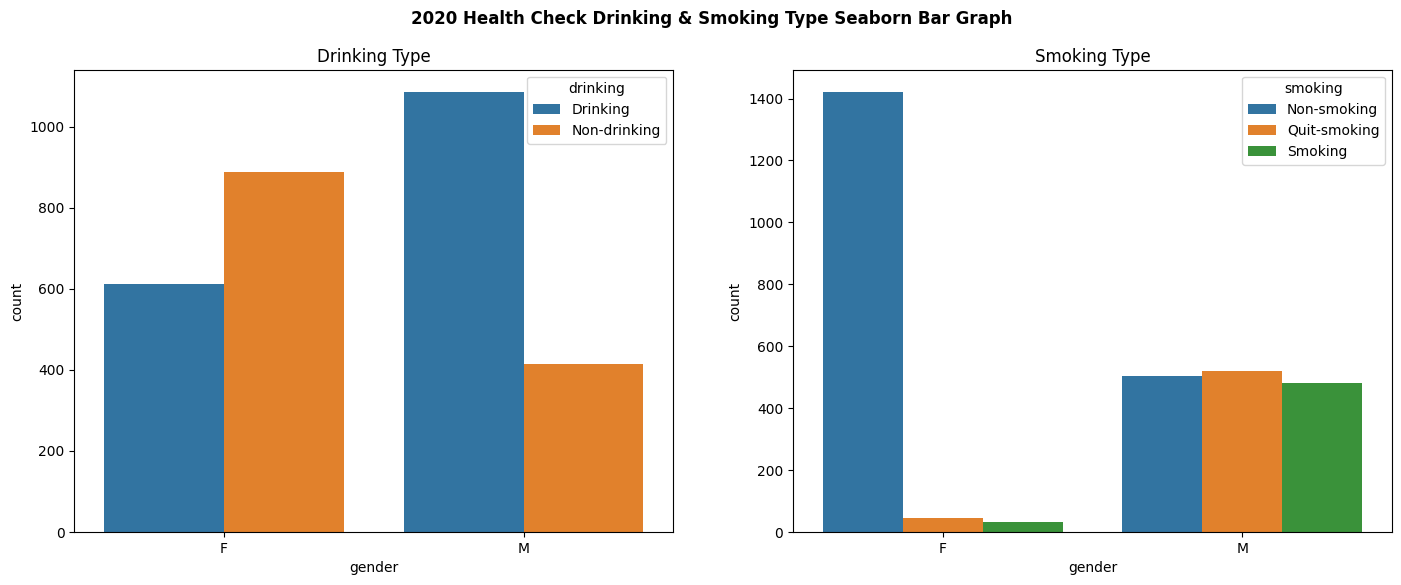

In [54]:
# 그래프 크기
fig = plt.figure(figsize=(17,6)) # inch단위

area1 = fig.add_subplot(1, 2, 1) # 하나의 행을 두 열로 나눔 (음주)
area2 = fig.add_subplot(1, 2, 2) #  (흡연)

# 성별(gender)과 음주(drinking) 정보를 바탕으로 막대그래프 생성
ax1 = sns.barplot(x='gender', y='count', hue='drinking', data=drinking, ax=area1)

# 성별(gender)과 흡연(smoking) 정보를 바탕으로 막대그래프 생성
ax2 = sns.barplot(x='gender', y='count', hue='smoking', data=smoking, ax=area2)

# 전체 그래프 제목
fig.suptitle('2020 Health Check Drinking & Smoking Type Seaborn Bar Graph', fontweight='bold')

# 서브 그래프 각각의 제목
area1.set_title('Drinking Type')
area2.set_title('Smoking Type')

# 그래프 출력
plt.show()


### 5.2.(3) 시본 산점도 그래프

데이터 준비하기

In [55]:
# 성별 데이터 분리
maledata = data6.loc[data6.gender == 'M', ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]
femaledata = data6.loc[data6.gender == 'F', ['gender', 'height', 'weight', 'waist', 'drinking', 'smoking']]

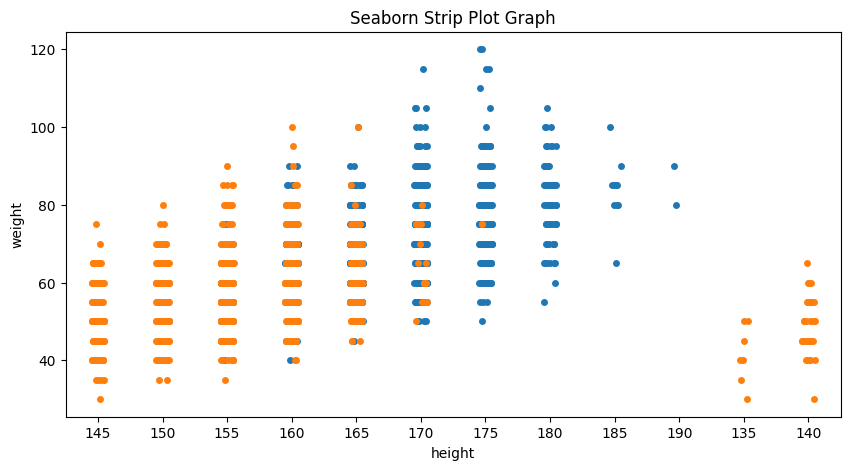

In [56]:
# 그래프 그리기

plt.figure(figsize=(10, 5)) # 도화지 크기 설정
plt.title('Seaborn Strip Plot Graph') # 제목

# 시본 산점도 그래프 그리기
sns.stripplot(x='height', y='weight', data=maledata)
sns.stripplot(x='height', y='weight', data=femaledata)

plt.show()

시본 스트립 플롯인데 **팔레트 속성로 색상 지정하기**

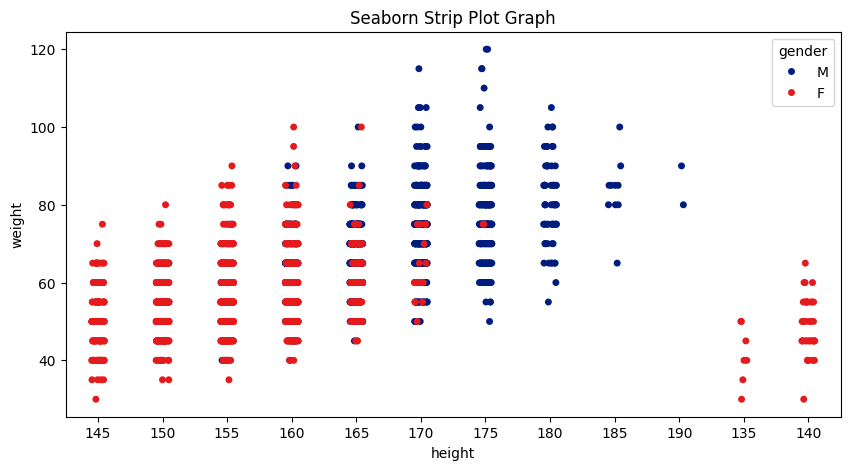

In [42]:
# 그래프 그리기

plt.figure(figsize=(10, 5)) # 도화지 크기 설정
plt.title('Seaborn Strip Plot Graph') # 제목

# 시본 산점도 그래프 그리기
sns.stripplot(x='height', y='weight',
              data=maledata,
              hue='gender', # 성별에 따라 색상을 다르게 표시
              palette='dark') # 색상 테마(palette) 지정: 진한 계열

sns.stripplot(x='height', y='weight',
              data=femaledata,
              hue='gender',
              palette='Set1') # 색상 테마(palette): 선명한 색 계열

plt.show()

##### 시본 스웜 플롯 그래프 그리기: swarmplot()으로 표현

- **swarmplot()**은 stripplot()보다 점들이 겹치지 않도록 자동으로 정렬해서 배치해주는 고급 버전 산점도

In [58]:
# 남성 및 여성 데이터 100개 가져오기
maledata100 = maledata.head(100)
femaledata100 = femaledata.head(100)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


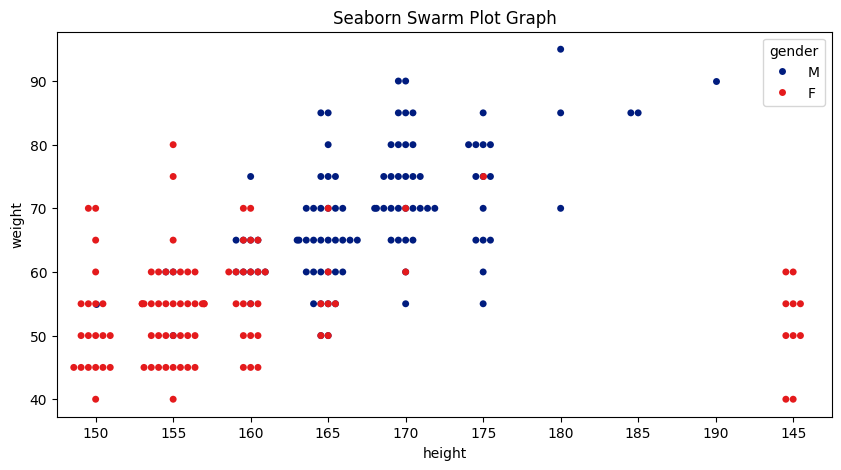

In [59]:
# 남성과 여성의 키 및 몸무게 시본 스웜 플롯 그래프
plt.figure(figsize=(10, 5))
plt.title('Seaborn Swarm Plot Graph')

sns.swarmplot(x='height', y='weight',
              data=maledata100,
              hue='gender',
              palette='dark')

sns.swarmplot(x='height', y='weight',
              data=femaledata100,
              hue='gender',
              palette='Set1')

plt.show()


### 5.2.(4) 시본 히스토그램

##### 시본 히스토그램 그리기

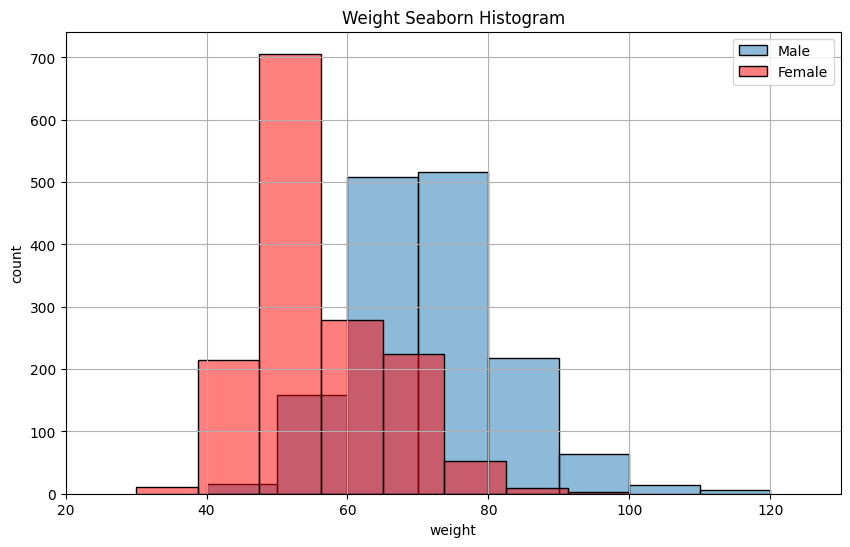

In [ ]:
plt.figure(figsize=(10, 6))

# 📌 남성 데이터의 몸무게에 대한 히스토그램
sns.histplot(maledata['weight'],
             bins=8, # 막대(빈)의 개수 설정 (8구간으로 나눔)
             alpha=0.5, # 투명도 설정(0은 투명, 1은 불투명)
             label='Male') # 범례에 표시될 라벨

# 📌 여성 데이터의 몸무게에 대한 히스토그램
sns.histplot(femaledata['weight'],
             bins=8,
             alpha=0.5,
             label='Female',
             color='r')

plt.xlim(20, 130)
plt.xlabel('weight')
plt.ylabel('count')
plt.title('Weight Seaborn Histogram')
plt.legend()
plt.grid()
plt.show()


##### 시본 히스토그램의 **커널 밀도 추정(KDE) 속성 지정**하기

- 📊 KDE란? : Kernel Density Estimation의 약자로 데이터를 부드러운 곡선으로 근사해서, 분포의 모양을 연속적으로 표현하는 방법

- 장점
1. 히스토그램보다 **분포의 형태(봉우리가 몇 개인지 등)**가 더 잘 보인다.
2. 평균/중앙값 근처의 밀도를 시각적으로 쉽게 파악 가능하다.

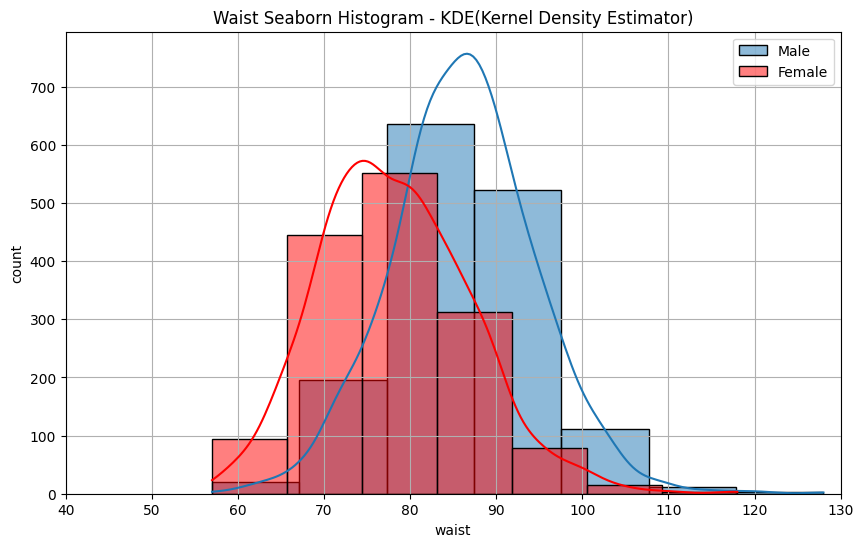

In [ ]:
plt.figure(figsize=(10, 6))

# 남성 허리둘레(waist)에 대한 히스토그램 + KDE
sns.histplot(maledata['waist'],
             bins=7, # # 7개 구간(계급)으로 나눔
             alpha=0.5,
             label='Male',
             kde=True) # 밀도 추정 곡선(Kernel Density Estimation) 추가

# 여성 허리둘레에 대한 히스토그램 + KDE
sns.histplot(femaledata['waist'],
             bins=7,
             alpha=0.5,
             label='Female',
             color='r',
             kde=True) # 밀도 추정 곡선(Kernel Density Estimation) 추가

plt.xlim(40, 130)
plt.xlabel('waist')
plt.ylabel('count')
plt.title('Waist Seaborn Histogram - KDE(Kernel Density Estimator)')
plt.legend()
plt.grid()
plt.show()


### 5.2.(5) 시본 상자수염(Box Plot) 그래프

##### 시본 상자수염 그래프 그리기

음주 여부에 따른 체중 분포 시각화

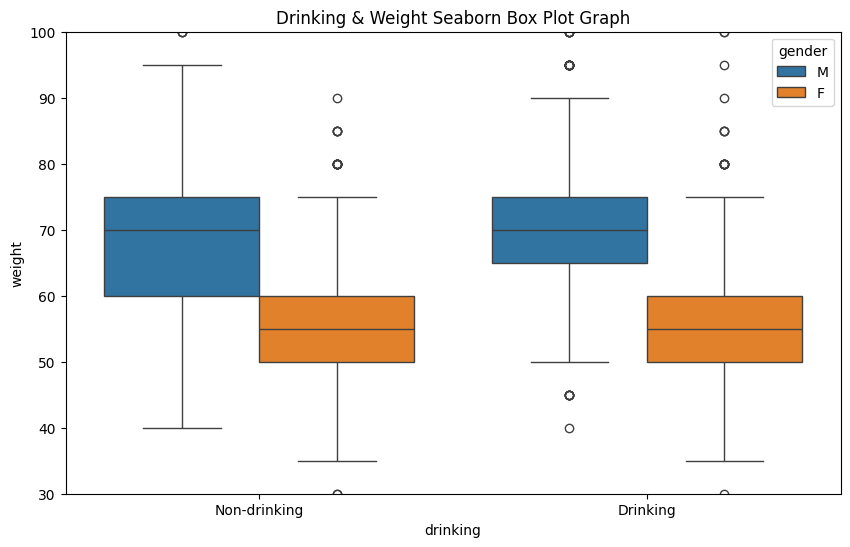

In [60]:
plt.figure(figsize=(10, 6))
plt.title('Drinking & Weight Seaborn Box Plot Graph')

# 상자수염 그래프 생성
sns.boxplot(x='drinking', # x축: 음주 여부
            y='weight', # y축: 몸무게
            hue='gender', # 색상 구분 기준
            data=data6) # 사용할 데이터프레임


plt.ylim(30, 100)
plt.show()

##### 시본 가로 상자수염 그래프 그리기

흡연 상태와 체중의 관계 (가로 Box Plot)

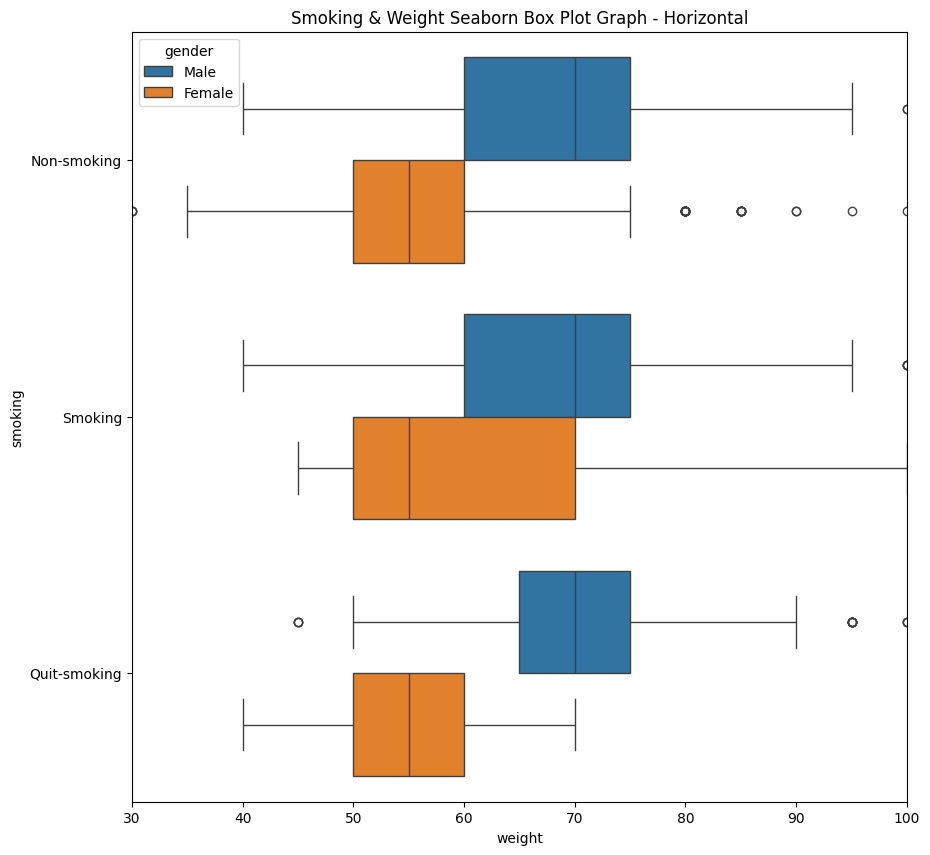

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Smoking & Weight Seaborn Box Plot Graph - Horizontal')

# 수평 상자수염 그래프 그리기 (orient='h'로 방향 전환)
sns.boxplot(x='weight',
            y='smoking',
            hue='gender',
            data=data6,
            orient='h') # ✔️ 수평(horizontal) 방향으로 그래프 출력!

plt.xlim(30, 100)

plt.show()

### 5.2.(6) 카운트 플롯(Count Plot) 그래프

-  countplot(): barplot()과 비슷해 보이지만, 차이점은 **countplot은 직접 계산 없이 개수를 자동으로 세서 그려준다**

##### 카운트 플롯 그래프 그리기

성별 음주 여부 카운트 플롯 그래프

<Axes: title={'center': 'Drinking Count Plot Graph'}, xlabel='drinking', ylabel='count'>

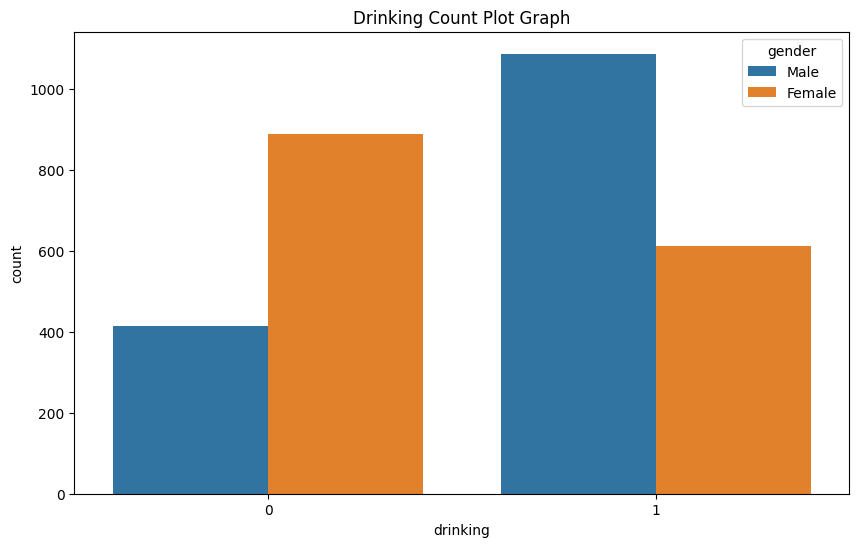

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Drinking Count Plot Graph')

sns.countplot(x='drinking', # x축에 표시할 카테고리형 변수
              hue='gender', # 막대의 색상 구분 기준
              data=data6) # 사용할 데이터프레임


##### 가로 카운트 플롯 그래프 그리기

성별 흡연 상태 가로 카운트 플롯 그래프

<Axes: title={'center': 'Smoking Count Plot Graph - Horizontal'}, xlabel='count', ylabel='smoking'>

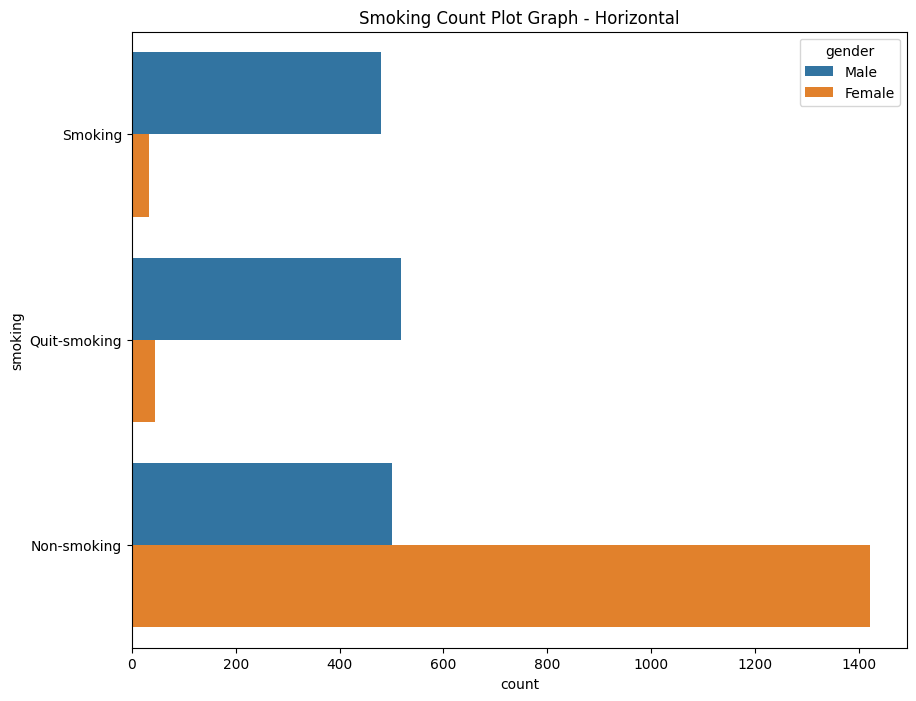

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Smoking Count Plot Graph - Horizontal')

sns.countplot(
    y='smoking', # y축에 카테고리형 변수
    hue='gender', # 성별에 따라 색상 구분
    data=data6, # 사용할 데이터프레임
    order=['Smoking', 'Quit-smoking', 'Non-smoking'] # y축에 나타날 순서를 수동 지정
)


### 5.2.(7) 🎻 바이올린 플롯(Violin Plot) 그래프

- 바이올린 플롯(violin plot)이란?
-  **상자수염 그래프(Box plot)**와
**커널 밀도 추정(KDE**) 곡선을 결합한 그래프
  
  
📦 구성 요소
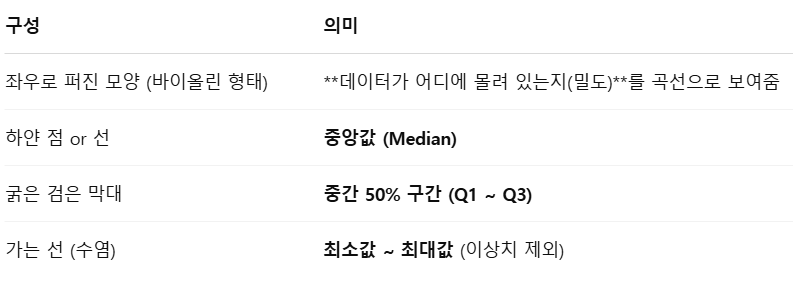

🎯 결과 해석

- Male + Drinking 쪽 바이올린이 아래쪽에서 넓다
→ 몸무게가 낮은 구간에 많이 분포된 것

- Female + Non-drinking이 위쪽으로 퍼졌다?
→ 고몸무게 쪽에도 값이 좀 있다는 뜻!
  
      
💡 왜 data6[data6.weight < 120]을 한 것일까?
- 몸무게가 120kg 이상인 이상치(outlier)가 있을 수 있기 때문에
- **극단적인 값이 곡선을 왜곡하지 않도록 필터링**

성별 & 음주 여부에 따른 체중 분포

<Axes: title={'center': 'Gender Weight Violin Plot Graph - Drinking category'}, xlabel='gender', ylabel='weight'>

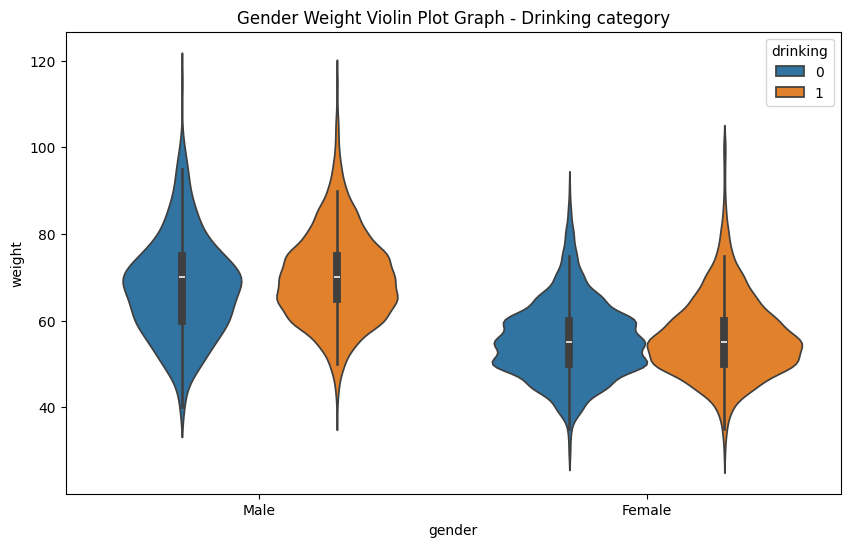

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Gender Weight Violin Plot Graph - Drinking category')

#  바이올린 플롯 생성
sns.violinplot(
    x='gender',
    y='weight',
    hue='drinking',
    data=data6[data6.weight < 120] # 사용할 데이터프레임
)


<Axes: title={'center': 'Gender Waist Violin Plot Graph - Drinking category'}, xlabel='waist', ylabel='gender'>

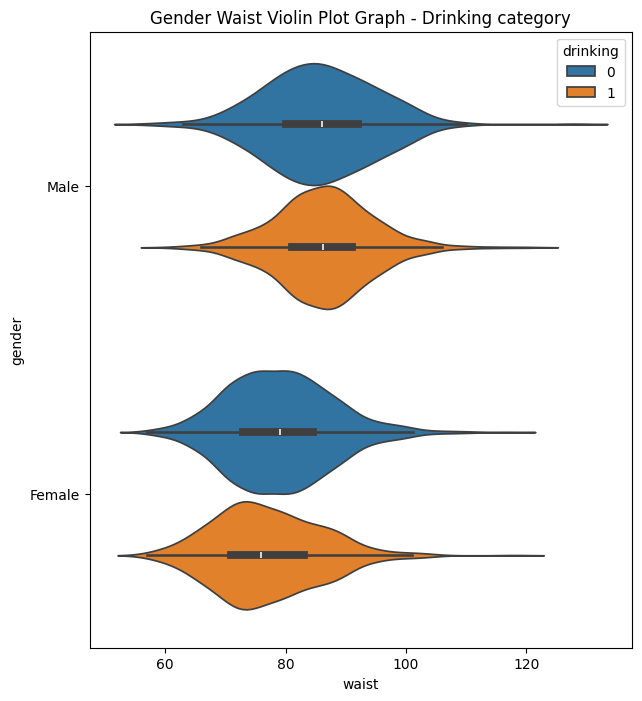

In [ ]:
plt.figure(figsize=(7, 8))
plt.title('Gender Waist Violin Plot Graph - Drinking category')

sns.violinplot(
    y='gender', # y축: 성별
    x='waist', # x축: 허리둘레
    hue='drinking', # 색상 기준: 음주 여부
    data=data6[data6.waist < 150] # 허리둘레 150cm 미만 데이터만 사용 (이상치 제거)
)


### 5.2.(8) 시본 히트맵 그래프

- 📊 Seaborn 히트맵(heatmap)란?
- 여러 변수 간의 상관관계(correlation coefficient)를 색상으로 시각화한 2차원 표 형태의 그래프


📌 상관계수
- 상관계수가 1.0이면 완벽한 양의 상관관계 (둘 다 증가)   
- 0 이면 전혀 상관없음.
- 1.0이면 완벽한 음의 상관관계( 한쪽이 증가하면 다른 쪽은 감소하는)

📌 corr() 함수 → 수치형 컬럼들 간의 피어슨 상관계수를 자동으로 계산함.
- 피어슨 상관계수란?
- 두 **수치형 변수 간의 직선적인 관계(=선형 관계)**가 얼마나 강하고, 어떤 방향으로 있는지를
–1.0 ~ +1.0 사이의 값으로 표현한 것.



📌 히트맵을 쓰면 좋은 이유
- 복잡한 수치 데이터를 한눈에 시각화
- 색깔이 진할수록 강한 상관관계!
- 특히 다변량 분석에서 관련성 있는 변수 쌍을 찾을 때 매우 유용함!

In [62]:
#  데이터 준비하기

# data3: 간단한 변수만 (성별, 음주, 흡연)
data3 = data.loc[:, ['gender', 'drinking', 'smoking']]

# data8: 건강 관련 다양한 변수 포함
data8 = data.loc[:, ['gender', 'weight', 'waist', 'drinking', 'smoking', 'cholesterol', 'HDL', 'LDL']]


<Axes: title={'center': '3x3 Heat Map Graph'}>

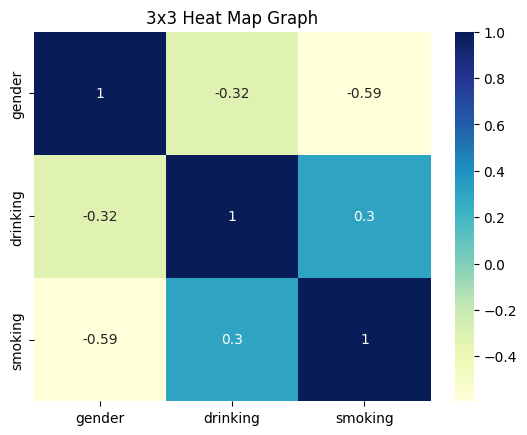

In [64]:
# 3x3 히트맵 그리기
# plt.figure(figsize=(10, 6)) # 도화지 크기 설정
plt.title('3x3 Heat Map Graph')

# 상관계수 행렬 계산
correlation_data3 = data3.corr()
# corr() -> 데이터프레임에서 수치형 변수들 간의 상관계수를 계산

# 히트맵 시각화
sns.heatmap(correlation_data3, # 계산된 상관계수 행렬 입력
            annot=True, # 각 셀에 상관계수 숫자를 표시
            cmap='YlGnBu') # 색상 팔레트: 연노랑(Yellow) → 초록(Green) → 파랑(Blue) 순으로


히트맵 보면 숫자가 있는데 1이면 관계가 많은거고 -는 관계가 없다는 듯임.   
corr() <- 상관관계를 알려주는 함수   
annot=True는 수치적인 값을 표현할건지 말건지 물어보는 것   
근데 색깔로 표현가능하긴함

##### 8x8 히트맵 그리기

- ✅ upp_mat = np.triu(correlation_data8) 이건 왜 필요한가?
- ✔️ 이유: 히트맵에서 상관계수 행렬은 항상 대각선을 기준으로 대칭이기 때문.
- weight vs waist의 상관계수 == waist vs weight의 상관계수
- 히트맵을 그리면 같은 값이 위/아래 양쪽에 반복돼서 보기 복잡해지기 때문.


✅ np.triu(): triangular upper의 약자로 행렬의 상삼각행렬만 남기고 나머지는 0 또는 False로 만드는 함수


<Axes: title={'center': '8x8 Heat Map Graph'}>

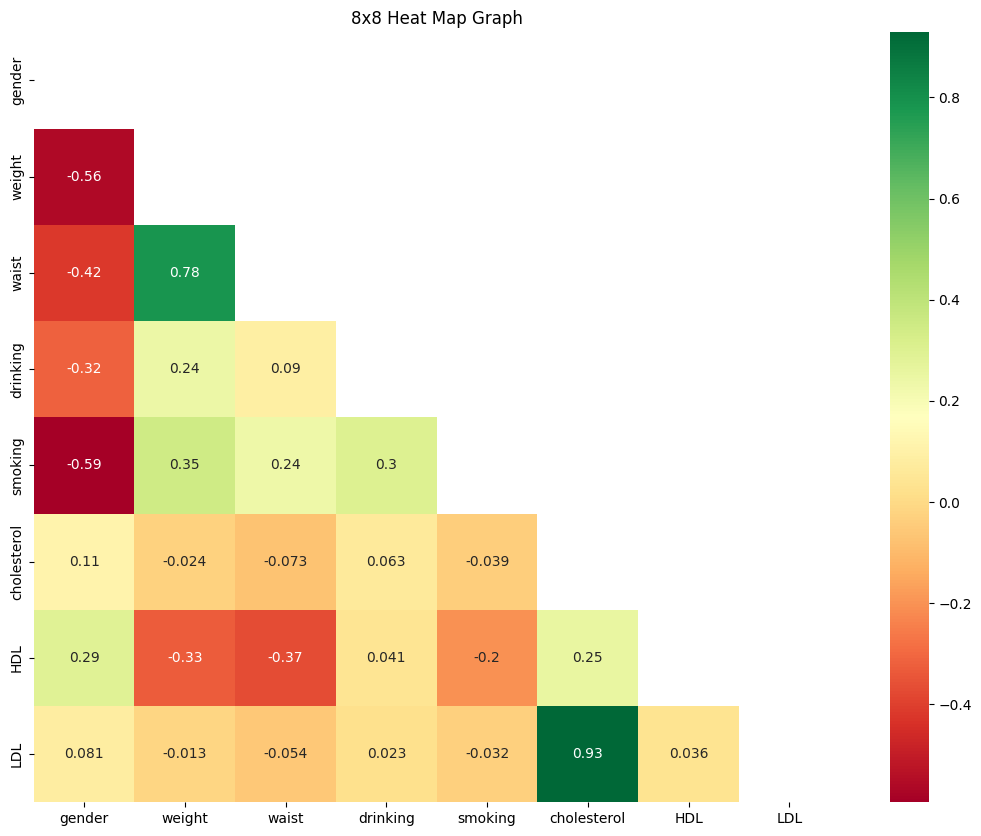

In [ ]:
plt.figure(figsize=(13, 10))
plt.title('8x8 Heat Map Graph')

correlation_data8 = data8.corr() # 상관계수 행렬 계산 (8개 변수 대상)
upp_mat = np.triu(correlation_data8) # 상삼각형만 True로 표시되는 마스크를 만들고

# 히트맵 시각화
sns.heatmap(correlation_data8, # 상관계수 행렬
            annot=True, # 셀 안에 상관계수 숫자 표시
            cmap='RdYlGn', # 색상 팔레트: 빨강(Red) - 노랑(Yellow) - 초록(Green)
            mask=upp_mat) # 상삼각 부분은 가리기 (mask 처리)


### 5.2.(9) 다중 플롯 그리드 그래프

- 🧠 FacetGrid란? 하나의 데이터프레임에서, 특정 변수의 값을 기준으로 여러 개의 그래프를 나누어 자동으로 그려주는 기능

- 조건별 분포 비교에 탁월함.


결과:
- 왼쪽: drinking = Non-drinking → 허리둘레 분포
- 오른쪽: drinking = Drinking → 허리둘레 분포  
둘 다 히스토그램 + 부드러운 곡선(KDE) 포함됨

##### 열 기준으로 나눈 패싯 그리드 히스토그램

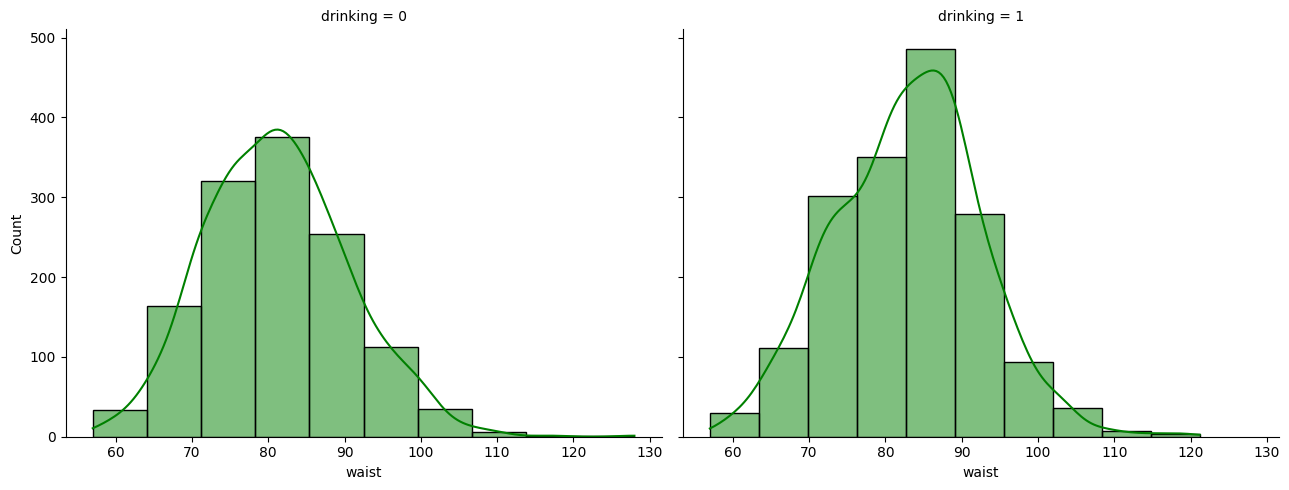

In [ ]:
# drinking 값이 다르면 그래프를 나눠서 따로 그리라는 의미

# FacetGrid 생성 (그리드형 다중 그래프 틀 만들기)
fg = sns.FacetGrid(data6, # 사용할 데이터프레임
                   col='drinking', # 'drinking' 값을 기준으로 그래프를 나눔
                   height=5, # 각 그래프(서브플롯)의 높이
                   aspect=1.3) # 가로세로 비율

# 위에서 만든 그리드에 히스토그램 + KDE 곡선 그리기
fg.map(
    sns.histplot,   # 사용할 그래프 함수: 시본의 히스토그램
    'waist',        # x축에 표시할 변수: 허리둘레
    bins=10,        # 막대 구간 수
    color='g',      # 초록색
    kde=True        # 밀도 곡선(Kernel Density Estimation) 추가
)



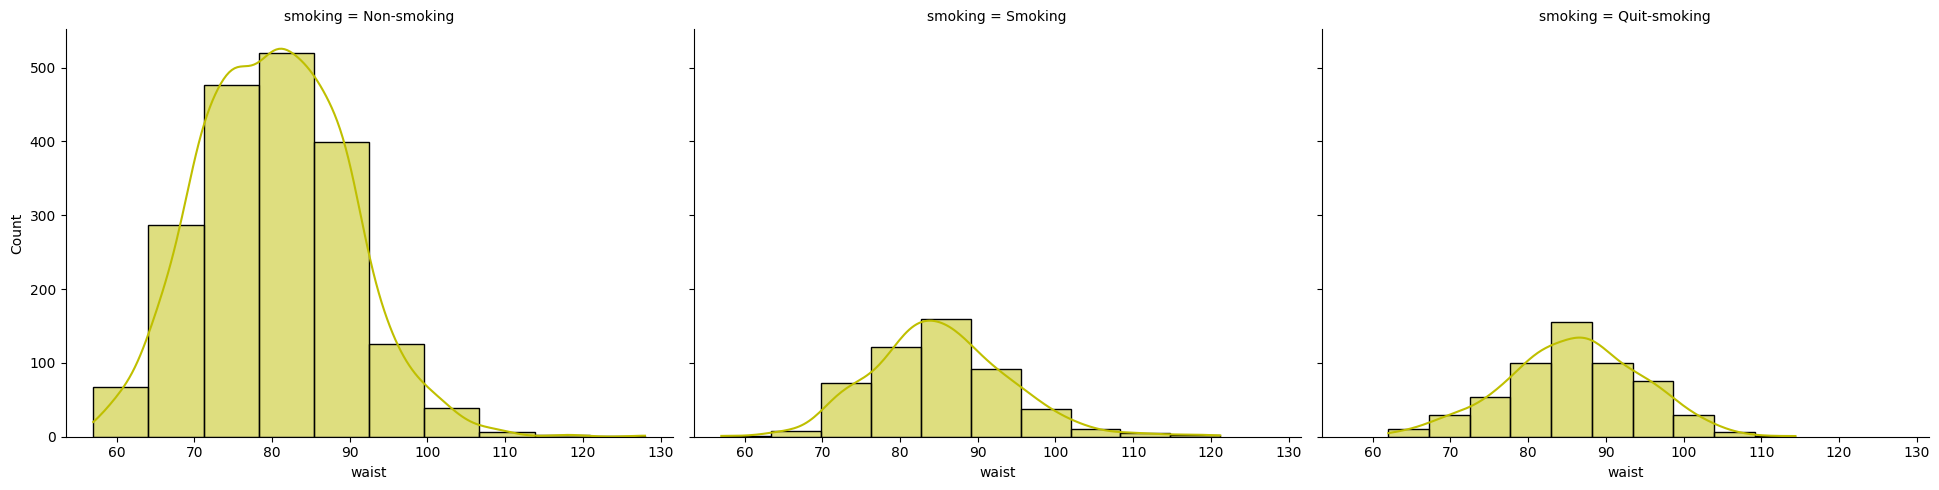

In [65]:
# col='' 이 부분에 drinking말고 smoking으로 나누고 색깔도 바꿔보기

# 흡연 상태(smoking)에 따라 히스토그램 + KDE 곡선을 나눠 그리기
fg = sns.FacetGrid(
    data6,              # 사용할 데이터프레임
    col='smoking',      # 그래프를 나눌 기준 열: 흡연 상태 (smoking)
    height=5,           # 각 서브플롯의 세로 크기 (inch 단위)
    aspect=1.3          # 가로세로 비율 (1.3이면 가로가 세로보다 조금 넓음)
)

fg.map(
    sns.histplot,       # 사용할 그래프 함수: 시본의 히스토그램
    'waist',            # x축에 사용할 변수: 허리둘레
    bins=10,            # 히스토그램 막대 개수
    color='y',          # 막대 색상: 노란색 (yellow)
    kde=True            # KDE 밀도 곡선 추가
)

##### 행과 열 기준으로 나눈 패싯 그리드 그래프 그리기

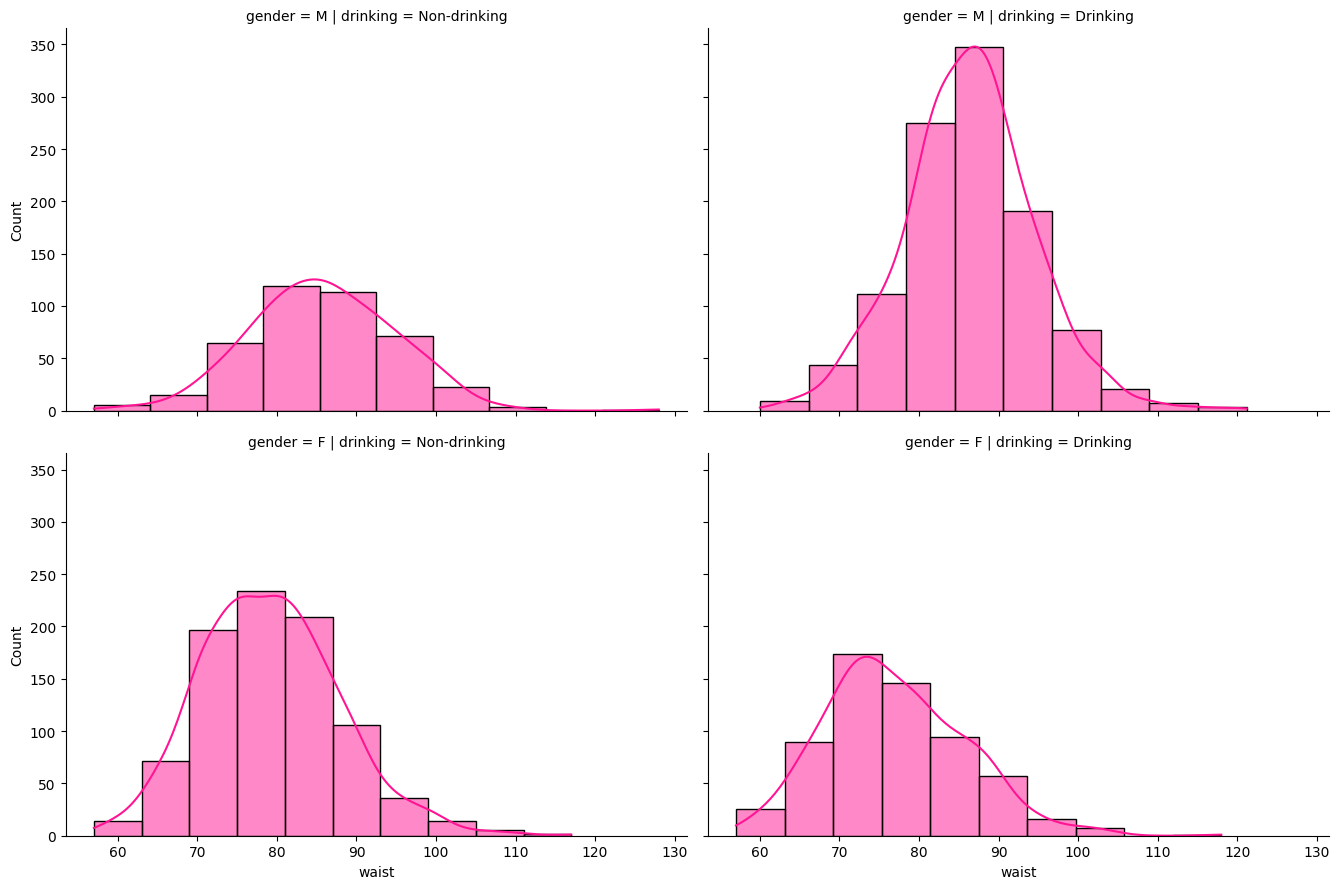

In [71]:
fg = sns.FacetGrid(
    data6, # 사용할 데이터프레임: data6
    row='gender', # 행 방향으로 성별(gender) 기준 나눔
    col='drinking', # 열 방향으로 음주 여부(drinking) 기준 나눔
    height=4.5, # 각 서브플롯의 세로 크기 (inch 단위)
    aspect=1.5 # 가로세로 비율 (1.5면 가로가 더 넓음)
)

fg.map(
    sns.histplot, # 사용할 그래프 함수: 시본의 히스토그램
    'waist', # x축에 사용할 변수: 허리둘레
    bins=10, # 히스토그램 막대 개수
    color='deeppink', # 막대 색상: 진분홍색
    kde=True # KDE 밀도 곡선 추가
)

페어 플롯(Pair Plot) 그래프   
얘는 수치데이터만 표현가능함!

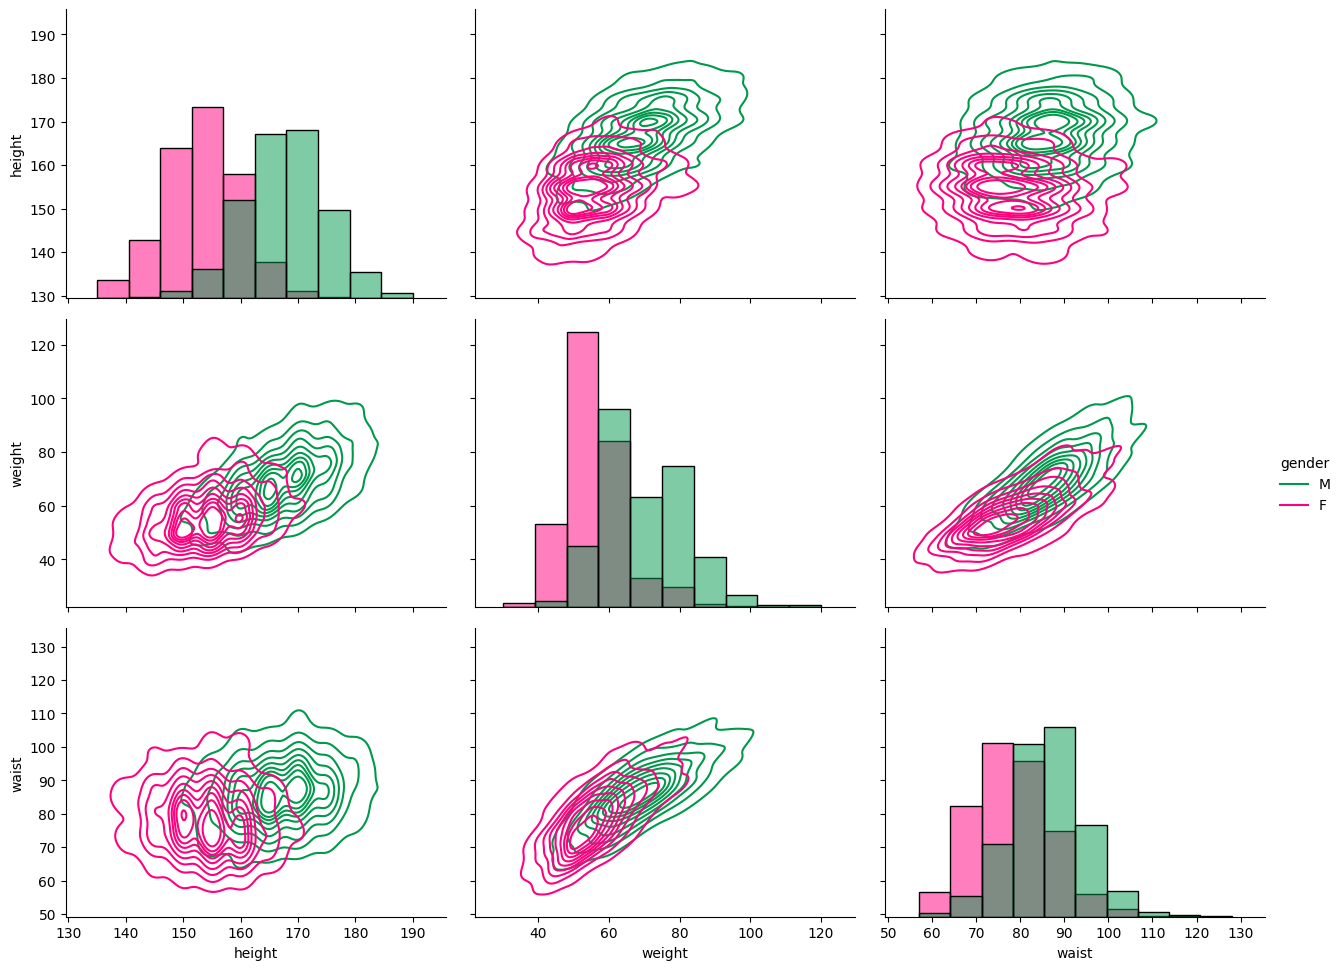

In [72]:
color = ['#00994C', '#FF007F'] # 초록색, 핫핑크

pp = sns.PairGrid(
    data6, # 사용할 데이터프레임
    hue='gender', # 성별에 따라 색상 다르게 표시
    palette=color, # 위에서 정의한 색상 리스트 적용
    height=3.3, # 각 subplot(작은 그래프)의 높이
    aspect=1.3 # 가로세로 비율 설정 (가로가 세로보다 1.3배 넓음)
)

pp.map_diag(
    sns.histplot, # 대각선(자기 자신 vs 자기 자신)에는 히스토그램 그리기
    bins=10 # 히스토그램 구간 개수
)

pp.map_offdiag(
    sns.kdeplot # 대각선 이외(변수 간 관계)는 KDE 곡선(밀도 곡선)으로 표현
)

pp.add_legend()   # 범례(legend) 추가해서 성별(Male/Female) 색상 표시


**결과 **

1. PairGrid() → 전체 구조 틀 만들기
2. map_diag() → 대각선: 단일 변수 분포 시각화
3. map_offdiag() → 오프다이애그널: 변수 간 관계 시각화
4. add_legend() → 색상과 그룹 정보를 연결해주는 범례 추가